# Comunicando Resultados
### Análises finais do capítulo 2 do módulo 2 do curso.

Neste Jupyter Notebook, serão realizados diversos processos de análises de dados e comparações através de gráficos. Todo o conteúdo aprendido até o momento deverá ser aplicado ao Dataset de bike_share de Chicago (Dataset do Projeto 1).

In [10]:
# Imports necessários e leitura de arquivo
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/chicago.csv')
df.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


In [11]:
# Explorando o DataFrame
df.describe()

,Trip Duration,Birth Year
count,1.551505e+06,1.234822e+06
mean,9.397778e+02,1.980864e+03
std,1.617702e+03,1.099154e+01
min,6.000000e+01,1.899000e+03
25%,3.920000e+02,1.975000e+03
50%,6.700000e+02,1.984000e+03
75%,1.127000e+03,1.989000e+03
max,8.633800e+04,2.016000e+03


#### Desafio
O método .describe() aplica-se apenas a colunas numéricas do DataFrame, ou seja, <i>Trip Duration</i> e <i>Birth Year</i> no caso. Tentaremos analisar alguns padrões de relação com outras colunas de modo a identificar correlações como, por exemplo, no tempo de viagem e o tipo de cliente, gênero e ano de nascimento, entre outros.

In [12]:
# Convertendo colunas Start Time e End Time em datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])
print(f'Tipos de Start Time e End Time após a conversão: {type(df["Start Time"][0])}')

Tipos de Start Time e End Time após a conversão: <class 'pandas._libs.tslib.Timestamp'>


In [13]:
# Setando Start Time como index
df_bike = df.set_index('Start Time')

In [15]:
df_bike.head()

,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
Start Time,,,,,,,
2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


In [16]:
# Vamos agora agregar o DataFrame por mês e retornar a média em cada um deles
df_mes = df_bike.resample(rule='M').mean()
df_mes

,Trip Duration,Birth Year
Start Time,,
2017-01-31,672.657483,1979.456104
2017-02-28,817.263997,1979.930365
2017-03-31,712.789506,1979.765755
2017-04-30,983.345646,1980.737486
2017-05-31,986.819208,1981.046151
2017-06-30,1052.853576,1981.978989


In [6]:
# Mudando o nome dos índices para retornar o respectivo mês

df_mes.index = df_mes.index.strftime('%B') # Se executado uma vez, dá erro na segunda. Modifica df_mes

In [7]:
# Renomeando índices 

df_mes.rename_axis('Mês').rename_axis('Atributos', axis='columns')

Atributos,Trip Duration,Birth Year
Mês,,
January,672.657483,1979.456104
February,817.263997,1979.930365
March,712.789506,1979.765755
April,983.345646,1980.737486
May,986.819208,1981.046151
June,1052.853576,1981.978989


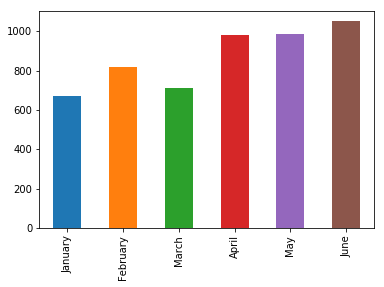

In [97]:
# Plotando alguns gráficos simples

df_mes['Trip Duration'].plot(kind='bar');

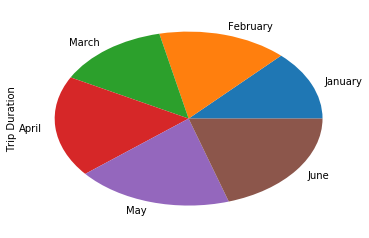

In [98]:
df_mes['Trip Duration'].plot(kind='pie')

In [106]:
df_mes_rev = df_mes.iloc[::-1]
df_mes_rev

,Trip Duration,Birth Year
June,1052.853576,1981.978989
May,986.819208,1981.046151
April,983.345646,1980.737486
March,712.789506,1979.765755
February,817.263997,1979.930365
January,672.657483,1979.456104


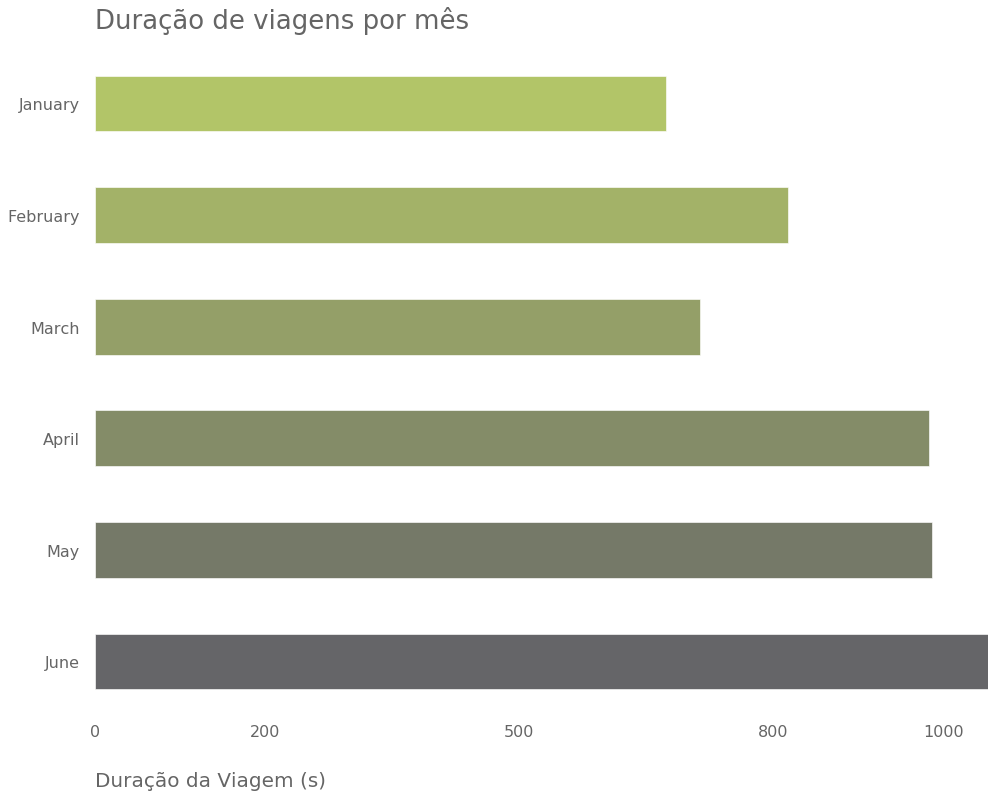

In [147]:
# Plots mais avançados

# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Duração de viagens por mês'

# Set color transparency (0: transparent; 1: solid)
a = 0.6
# Create a colormap
customcmap = [(x/10.0,  x/8.0, 0.02) for x in range(len(df_mes))]

# Plot the 'Trip Duration' column as horizontal bar plot
df_mes_rev['Trip Duration'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df_mes_rev['Trip Duration'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
# Pandas trick: remove weird dotted line on axis
# ax.lines[0].set_visible(False)
 
# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.02))
 
# Set x axis label on top of plot, set label text
#ax.xaxis.set_label_position('bottom')
xlab = 'Duração da Viagem (s)'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, -0.08)
 
# Position x tick labels on top
# ax.xaxis.tick_top()

# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
 
# Customize x tick lables
xticks = [0,200,500,800,1000]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=16, alpha=a)
 
# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=16, alpha=a)
ax.yaxis.set_tick_params(pad=12)

"xlab = 'Duração da Viagem (s)'\nax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')\nax.xaxis.set_label_coords(0, -0.08)\n \n# Position x tick labels on top\n# ax.xaxis.tick_top()\n\n# Remove tick lines in x and y axes\nax.yaxis.set_ticks_position('none')\nax.xaxis.set_ticks_position('none')\n \n# Customize y tick lables\nyticks = [0,200,500,800,1000]\nax.xaxis.set_ticks(yticks)\nax.set_xticklabels(yticks, fontsize=16, alpha=a)\n \n# Customize y tick labels\nyticks = [item.get_text() for item in ax.get_yticklabels()]\nax.set_yticklabels(yticks, fontsize=16, alpha=a)\nax.yaxis.set_tick_params(pad=12)"

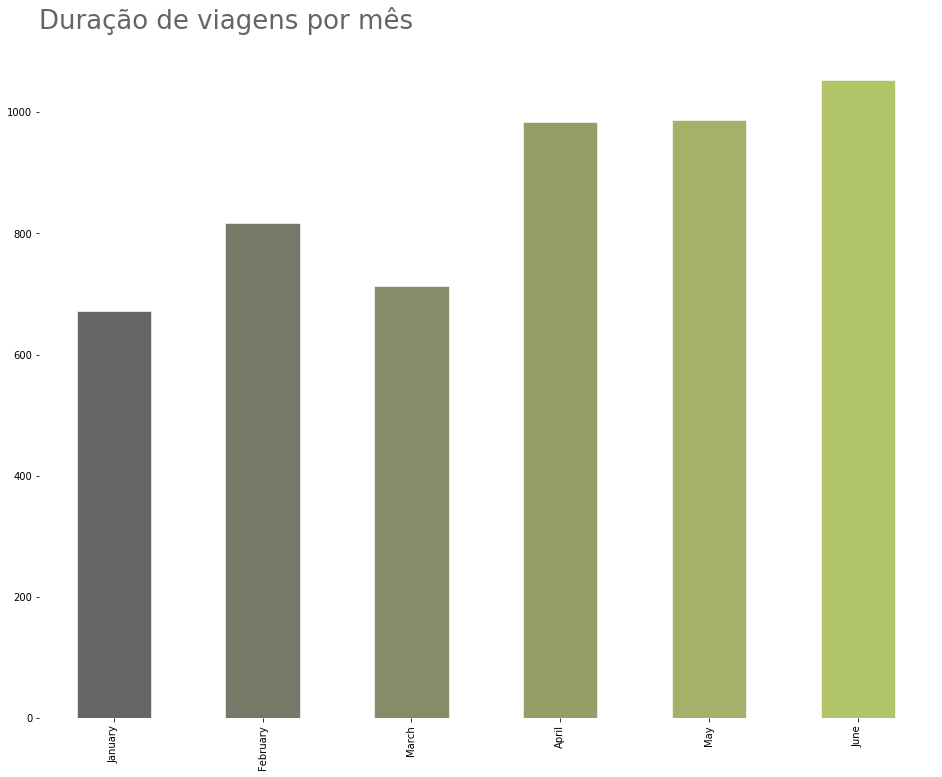

In [157]:
# Plots mais avançados

# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Duração de viagens por mês'

# Set color transparency (0: transparent; 1: solid)
a = 0.6
# Create a colormap
customcmap = [(x/10.0,  x/8.0, 0.02) for x in range(len(df_mes))]

# Plot the 'Trip Duration' column as horizontal bar plot
df_mes['Trip Duration'].plot(kind='bar', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df_mes['Trip Duration'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
# Pandas trick: remove weird dotted line on axis
# ax.lines[0].set_visible(False)
 
# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.02))
 
# Set x axis label on top of plot, set label text
#ax.xaxis.set_label_position('bottom')
"""xlab = 'Duração da Viagem (s)'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, -0.08)
 
# Position x tick labels on top
# ax.xaxis.tick_top()

# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
 
# Customize y tick lables
yticks = [0,200,500,800,1000]
ax.xaxis.set_ticks(yticks)
ax.set_xticklabels(yticks, fontsize=16, alpha=a)
 
# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=16, alpha=a)
ax.yaxis.set_tick_params(pad=12)"""

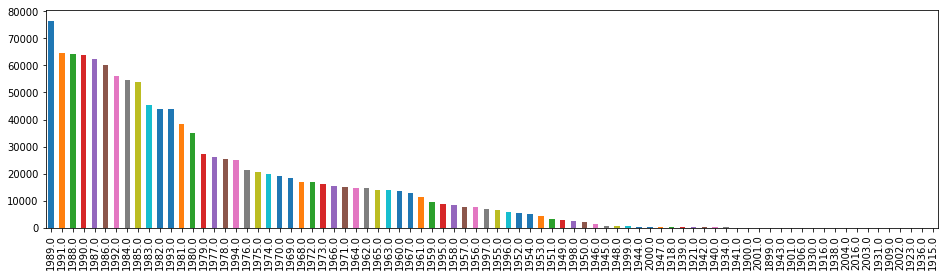

In [71]:
df_bike['Birth Year'].value_counts().plot(kind='bar', figsize=(16, 4))

In [72]:
monthly = df_bike.resample(rule='M').mean()

In [73]:
monthly

,Trip Duration,Birth Year
Start Time,,
2017-01-31,672.657483,1979.456104
2017-02-28,817.263997,1979.930365
2017-03-31,712.789506,1979.765755
2017-04-30,983.345646,1980.737486
2017-05-31,986.819208,1981.046151
2017-06-30,1052.853576,1981.978989


In [75]:
df_bike_6['Trip Duration'].mean()

1052.8535762643419

In [76]:
df_bike_5['Birth Year'].mean()

1981.0377814339454

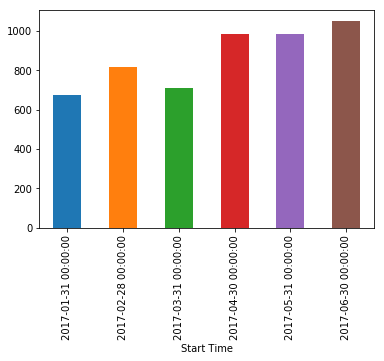

In [78]:
monthly['Trip Duration'].plot(kind='bar')

<b>Site interessante: </b>
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [67]:
gp = df.groupby('Start Time')['Trip Duration'].count()

In [68]:
gp

Start Time
2017-01-01 00:00:36    1
2017-01-01 00:02:54    1
2017-01-01 00:06:06    1
2017-01-01 00:07:28    1
2017-01-01 00:07:57    1
2017-01-01 00:10:44    1
2017-01-01 00:11:34    1
2017-01-01 00:14:57    1
2017-01-01 00:15:03    1
2017-01-01 00:17:01    1
2017-01-01 00:17:13    1
2017-01-01 00:18:28    1
2017-01-01 00:18:50    1
2017-01-01 00:23:41    1
2017-01-01 00:25:47    2
2017-01-01 00:26:21    1
2017-01-01 00:27:21    1
2017-01-01 00:27:28    1
2017-01-01 00:27:45    1
2017-01-01 00:27:52    1
2017-01-01 00:30:07    1
2017-01-01 00:30:10    1
2017-01-01 00:32:58    1
2017-01-01 00:33:39    1
2017-01-01 00:34:23    1
2017-01-01 00:35:23    1
2017-01-01 00:35:26    1
2017-01-01 00:35:32    1
2017-01-01 00:35:34    1
2017-01-01 00:37:02    1
                      ..
2017-06-30 23:51:39    1
2017-06-30 23:52:07    1
2017-06-30 23:52:33    1
2017-06-30 23:52:40    2
2017-06-30 23:52:43    1
2017-06-30 23:52:54    1
2017-06-30 23:52:56    2
2017-06-30 23:53:05    1
2017-06-30 23: